## Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.
Dataset
Population of U.S. Cities
## Description
The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.
## Format
This data frame contains the following columns:
u The 1920 population.
x The 1930 population.
There is one unnamed column also in this dataset. Please remove and ignore that coloumn.
Source
The data were obtained from
Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley
References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import zscore


## Question 1 Read the dataset given in file named 'bigcity.csv'.
## And check the dataset for any missing values and also print out the correlation matrix

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [8]:
bigcity_data = pd.read_csv("bigcity.csv")

In [9]:
bigcity_data.head()

Unnamed: 0    u    x
0           1  138  143
1           2   93  104
2           3   61   69
3           4  179  260
4           5   48   75

In [10]:
bigcity_data.columns

Index(['Unnamed: 0', 'u', 'x'], dtype='object')

In [12]:
bigcity = bigcity_data.iloc[:,1:3]
bigcity

u    x
0   138  143
1    93  104
2    61   69
3   179  260
4    48   75
5    37   63
6    29   50
7    23   48
8    30  111
9     2   50
10   38   52
11   46   53
12   71   79
13   25   57
14  298  317
15   74   93
16   50   58
17   76   80
18  381  464
19  387  459
20   78  106
21   60   57
22  507  634
23   50   64
24   77   89
25   64   77
26   40   60
27  136  139
28  243  291
29  256  288
30   94   85
31   36   46
32   45   53
33   67   67
34  120  115
35  172  183
36   66   86
37   46   65
38  121  113
39   44   58
40   64   63
41   56  142
42   40   64
43  116  130
44   87  105
45   43   61
46   43   50
47  161  232
48   36   54

In [13]:
check_isna = bigcity.isna().sum()

In [14]:
check_isna

u    0
x    0
dtype: int64

In [15]:
corr_mat = np.corrcoef(bigcity)

C:\Users\kumar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\kumar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [16]:
corr_mat

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [20]:
bigcity.corr()

u         x
u  1.000000  0.981742
x  0.981742  1.000000

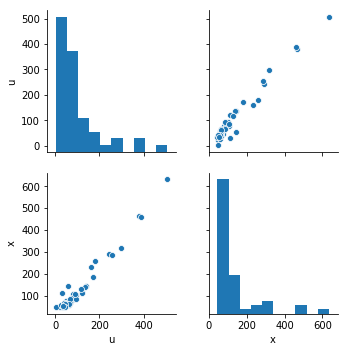

In [50]:
sns.pairplot(bigcity)

The high correlation betwwen u and x indicates that the variable u can be a good predictor of variable x

## Question 2 - Transform the dataset and Split data into train, test sets.
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe.
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [51]:
bigcity_scale = bigcity.apply(zscore)

In [52]:
bigcity_scale.shape

(49, 2)

In [65]:
X_data = np.array( bigcity_scale['u'] )

In [79]:
bigcity_scale.corr()

u         x
u  1.000000  0.981742
x  0.981742  1.000000

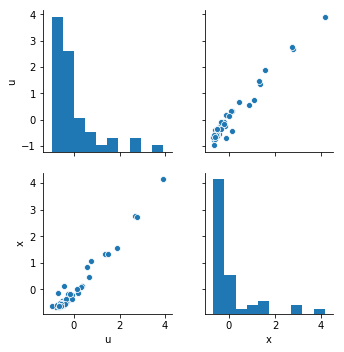

In [80]:
sns.pairplot(bigcity_scale)

In [66]:

X_data1 = pd.DataFrame(X_data.reshape(-1,1),columns=['u'])
Y_data = bigcity_scale[['x']]


In [68]:
X_data1.head(3)

u
0  0.337324
1 -0.098156
2 -0.407831

In [69]:
Y_data.head(3)

x
0  0.124768
1 -0.195275
2 -0.482494

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X_data1, Y_data, test_size=0.20, random_state=1)

## Question 3 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [72]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
#co-efficient
b0 = 0
for idx, col_name in enumerate(X_train.columns):
    b0 = b0 + regression_model.coef_[0][idx]
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for u is 0.9831983927040457


In [74]:
b0

0.9831983927040457

In [75]:
#intercept
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.01240497188752547


## Question 4 - Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.
Hint - y = mx + c, plot y

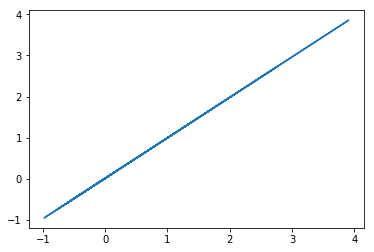

In [76]:
 y = b0*X_train + intercept
plt.plot(X_train,y)

## Question 5 - Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. 
Performing root operation over mean square error over mean square error gives you root mean square error

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_predict = regression_model.predict(X_test)
print("Mean squared error {}".format(mean_squared_error(y_test,y_predict)))
print("R2 Score value {}".format(r2_score(y_test,y_predict)))

Mean squared error 0.03682752839849216
R2 Score value 0.918192256039698


## Question 6 - Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [85]:
train_model_score = regression_model.score(X_train, y_train)
test_model_score = regression_model.score(X_test, y_test)

train_model_score



0.9682175540860047

In [86]:
test_model_score

0.9181922560396981

# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [170]:
#Import all the necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import cross_val_score

## Q7. Load the PIMA Indian Diabetes file into Python DataFrame. And print 10 samples from the dataset


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [87]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")

In [88]:
diabetes.sample(n=10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
410            6      102             90             39        0  35.7   
657            1      120             80             48      200  38.9   
528            0      117             66             31      188  30.8   
57             0      100             88             60      110  46.8   
466            0       74             52             10       36  27.8   
472            0      119             66             27        0  38.8   
404            5      168             64              0        0  32.9   
763           10      101             76             48      180  32.9   
288            4       96             56             17       49  20.8   
133            8       84             74             31        0  38.3   

     DiabetesPedigreeFunction  Age  Class  
410                     0.674   28      0  
657                     1.162   41      0  
528                     0.493   22      0  
57                      0.962   31      0  
466                     0.269   22      0  
472                     0.259   22      0  
404                     0.135   41      1  
763                     0.171   63      0  
288                     0.340   26      0  
133                     0.457   39      0

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

## Q8 Print the datatypes of each column and the shape of the dataset. And replace all the 0s in the column with the median of the same column value accordingly.

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [89]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [90]:
diabetes.shape

(768, 9)

In [94]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [95]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [102]:
diabetes_features_data = diabetes.iloc[:,:-1].apply(lambda x: x.replace(0,x.median()),axis=0)

In [103]:
diabetes_features_data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            3      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [104]:
diabetes.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Class  
0                     0.627   50      1  
1                     0.351   31      0  
2                     0.672   32      1  
3                     0.167   21      0  
4                     2.288   33      1

In [108]:
diabetes_features_data["Class"] = diabetes["Class"]

In [110]:
diabetes_features_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            3      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Class  
0                     0.627   50      1  
1                     0.351   31      0  
2                     0.672   32      1  
3                     0.167   21      0  
4                     2.288   33      1

## Q9 See the distribution of 'Class' variable and plot it using appropriate graph.

## Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using the plot - infer the relationship between different variables

C:\Users\kumar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kumar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


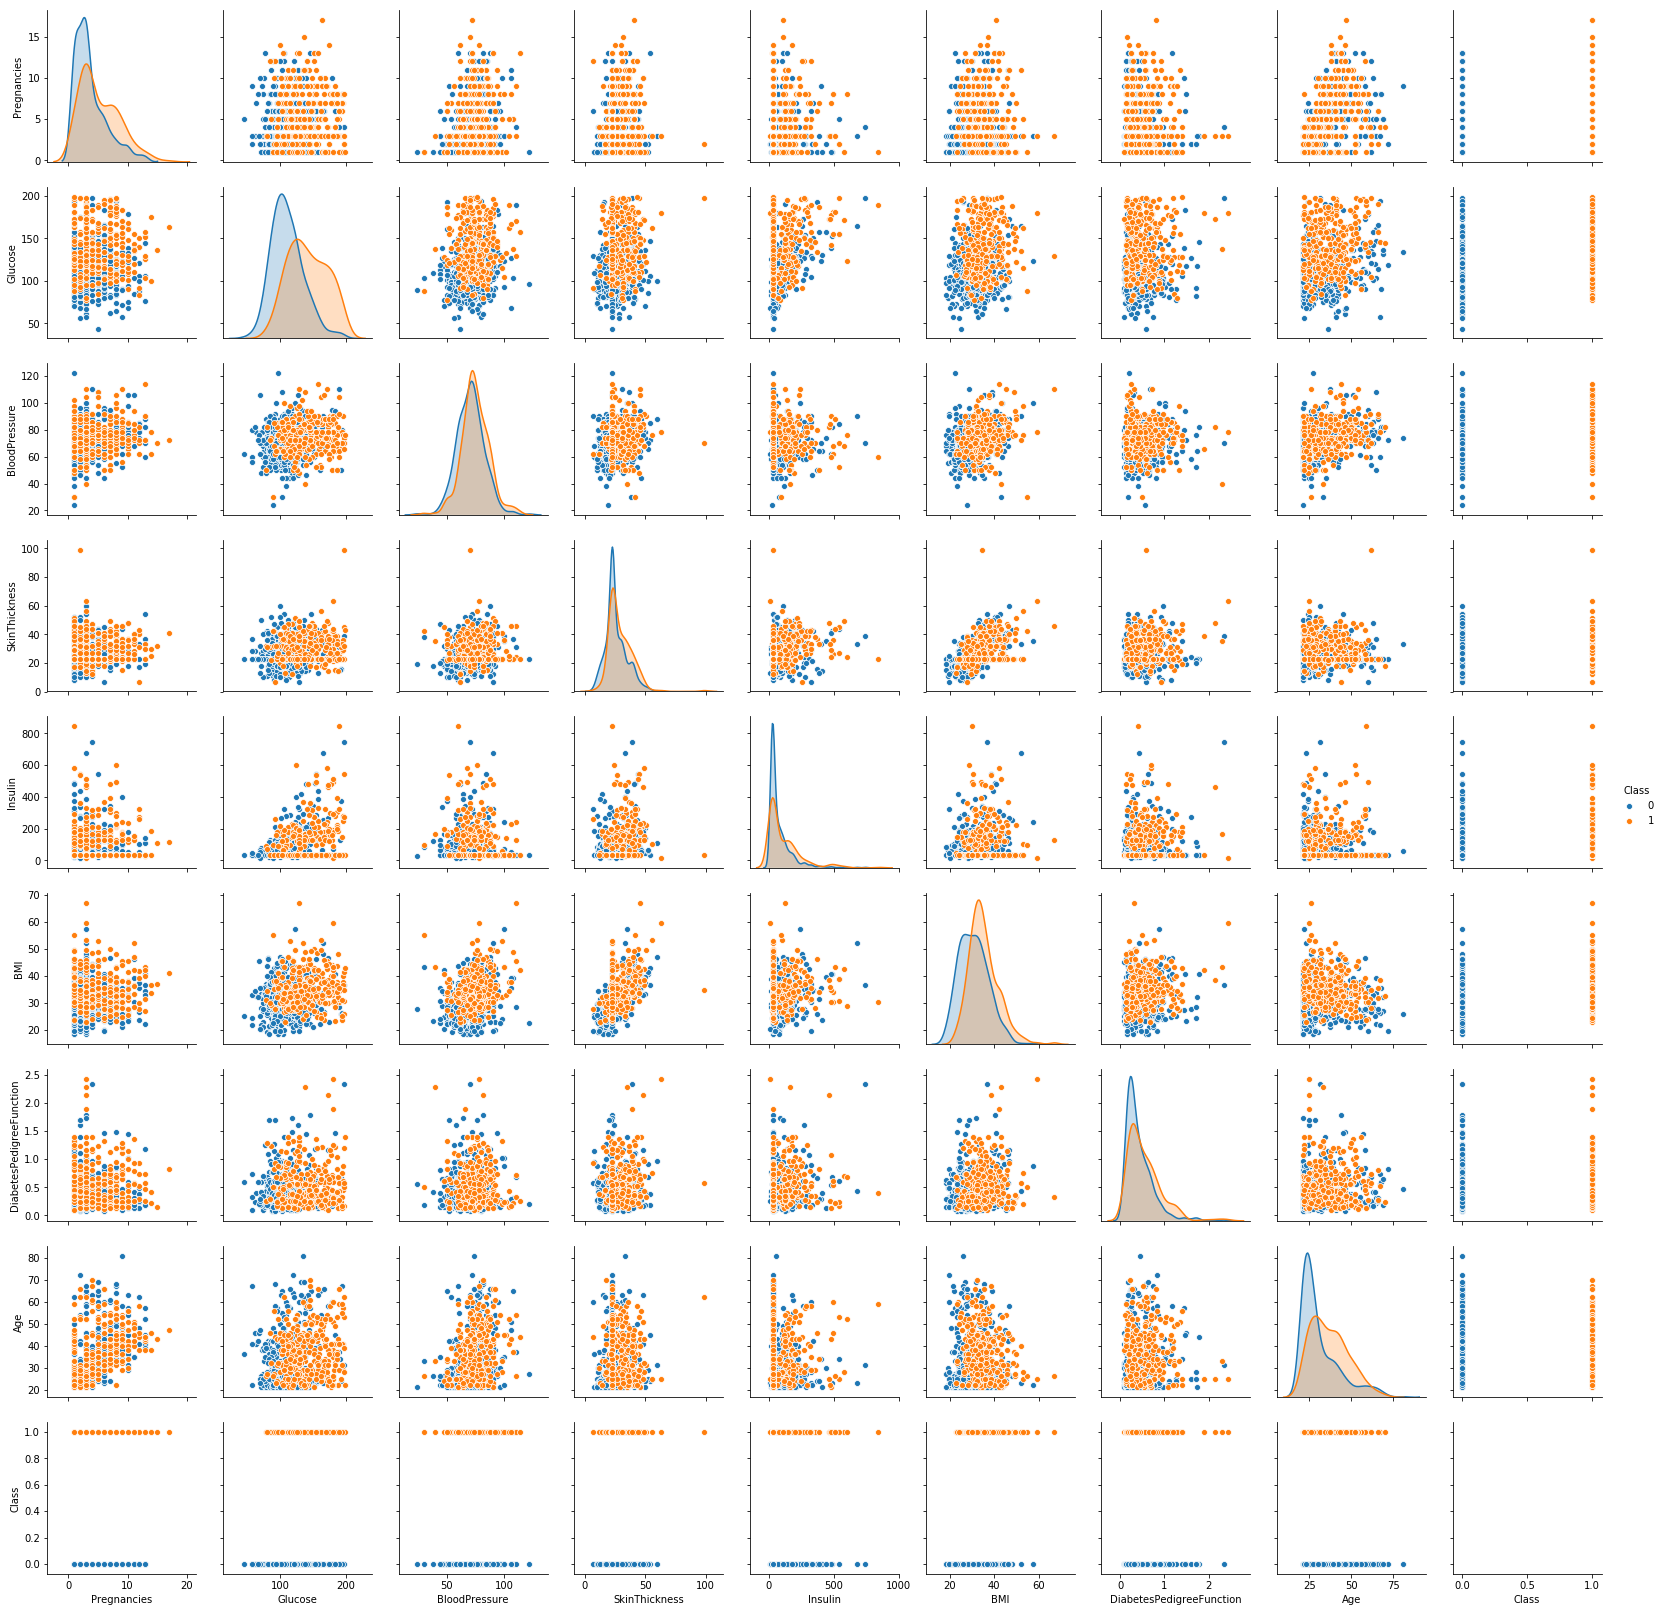

In [111]:
sns.pairplot(diabetes_features_data,diag_kind="kde",hue="Class")

In [113]:
diabetes_features_data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.149326       0.247530       0.060706   
Glucose                      0.149326  1.000000       0.218937       0.172143   
BloodPressure                0.247530  0.218937       1.000000       0.147809   
SkinThickness                0.060706  0.172143       0.147809       1.000000   
Insulin                     -0.059580  0.357573      -0.028721       0.238188   
BMI                          0.080540  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.016151  0.137327      -0.002378       0.142977   
Age                          0.538169  0.266909       0.324915       0.054514   
Class                        0.245466  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.059580  0.080540                 -0.016151   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   
Class                     0.148457  0.312249                  0.173844   

                               Age     Class  
Pregnancies               0.538169  0.245466  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Class                     0.238356  1.000000

## Answer or Observation ::  glcose, BMI and age are more correlated with the target varible "Class"

## Q10 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test). And create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.


In [116]:
X= diabetes_features_data.drop("Class",axis=1)
y = diabetes_features_data[["Class"]]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [120]:
model = DecisionTreeClassifier(criterion="entropy")

In [123]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
model.score(X_test,y_test)

0.7142857142857143

## Q11 Print the accuracyof the model and print the confusion matrix.

In [125]:
y_pred = model.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred)

0.7142857142857143

In [127]:
metrics.confusion_matrix(y_test,y_pred)

array([[114,  32],
       [ 34,  51]], dtype=int64)

Print the feature importance of the decision model - Optional

In [130]:
model.feature_importances_

array([0.07478985, 0.23110121, 0.1258632 , 0.04976623, 0.        ,
       0.25514714, 0.1118137 , 0.15151866])

## Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [132]:
model_rf = RandomForestClassifier(n_estimators=50,criterion="entropy",max_depth=3,random_state=0)

In [133]:
model_rf.fit(X_train, y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [134]:
model_rf.score(X_test,y_test)

0.7662337662337663

In [136]:
Y_pred = model_rf.predict(X_test)

In [137]:
metrics.confusion_matrix(y_test,Y_pred)

array([[133,  13],
       [ 41,  44]], dtype=int64)

In [138]:
accuracy_score(y_test,Y_pred)

0.7662337662337663

## Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [140]:
model_ada = AdaBoostClassifier(base_estimator=model,n_estimators=51)

In [141]:
model_ada.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [142]:
model_ada.score(X_test,y_test)

0.7012987012987013

In [144]:
y_pred = model_ada.predict(X_test)

In [145]:
metrics.confusion_matrix(y_test,y_pred)

array([[110,  36],
       [ 33,  52]], dtype=int64)

In [146]:
accuracy_score(y_test,y_pred)

0.7012987012987013

## Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [148]:
model_bagclass = BaggingClassifier(base_estimator=model,n_estimators=51,oob_score=True)

In [149]:
model_bagclass.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [150]:
model_bagclass.score(X_test,y_test)

0.7792207792207793

In [152]:
y_pred = model_bagclass.predict(X_test)

In [153]:
metrics.confusion_matrix(y_test,y_pred)

array([[124,  22],
       [ 29,  56]], dtype=int64)

In [154]:
accuracy_score(y_test,y_pred)

0.7792207792207793

## Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [156]:
model_gbc = GradientBoostingClassifier(n_estimators=51)

In [157]:
model_gbc.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [158]:
model_gbc.score(X_test,y_test)

0.7965367965367965

In [159]:
y_pred = model_gbc.predict(X_test)

In [160]:
metrics.confusion_matrix(y_test,y_pred)

array([[126,  20],
       [ 27,  58]], dtype=int64)

In [161]:
accuracy_score(y_test,y_pred)

0.7965367965367965

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [163]:
enclf = VotingClassifier(estimators=[('rf',model_rf),('dt',model),('ada',model_ada),('bag',model_bagclass),('gbc',model_gbc)],voting="hard")

In [175]:
for clf, label in zip([model_rf,model,model_ada,model_bagclass,model_gbc,enclf],['Random Forest','Decision tree','AdaBoost','Bagging','gradient Boost','ensemble']):
    scores =  cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy : %f (+ / - %f ) [%s] " % (scores.mean(),scores.std(),label))

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

Accuracy : 0.753934 (+ / - 0.014577 ) [Random Forest] 
Accuracy : 0.703200 (+ / - 0.045987 ) [Decision tree] 
Accuracy : 0.703192 (+ / - 0.037752 ) [AdaBoost] 


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy : 0.755275 (+ / - 0.041838 ) [Bagging] 
Accuracy : 0.768245 (+ / - 0.025414 ) [gradient Boost] 


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy : 0.756549 (+ / - 0.034259 ) [ensemble] 


In [173]:
enclf.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [174]:
enclf.score(X_test,y_test)

0.8008658008658008

In [176]:
y_pred = enclf.predict(X_test)

In [177]:
metrics.confusion_matrix(y_test, y_pred)

array([[129,  17],
       [ 29,  56]], dtype=int64)

## Answer :: Finally Gradient boost is the best model for production 